<a href="https://colab.research.google.com/github/dhanakakani/Dhana_INFO5502_Spring2022/blob/master/PRICE_VS_SIZE_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as ny
import pandas as ps
import matplotlib.pyplot as pt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 

In [2]:
from google.colab import files
uploading=files.upload()

Saving monet.csv to monet.csv


In [3]:
data = ps.read_csv("monet.csv")

In [4]:
data

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


In [5]:
data['SIZE'] = data.HEIGHT*data.WIDTH

In [6]:
train = data.sample(frac = 0.7)
test = data.drop(train.index)

In [7]:
mod=linear_model.LinearRegression()
mod.fit(train[['PRICE']],train.SIZE)
train

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
115,0.530500,23.5,29.0,1,95,1,681.50
427,8.252500,25.6,39.6,1,375,1,1013.76
222,8.997960,39.4,78.7,0,184,2,3100.78
109,1.760000,35.0,27.0,1,89,2,945.00
93,0.770577,28.7,36.4,1,74,2,1044.68
...,...,...,...,...,...,...,...
312,0.442500,21.9,29.0,1,267,2,635.10
245,2.000000,32.0,26.0,1,206,2,832.00
41,0.760486,23.9,31.5,1,33,1,752.85
59,0.330000,25.8,32.1,0,49,2,828.18


In [8]:
x = mod.predict(test[['PRICE']])

In [9]:
x

array([1044.74958245,  823.06273678, 2374.64481781,  827.25022107,
        969.29159146,  825.79887708,  882.21095233,  811.14268208,
        839.97964986,  814.11698555,  892.79862566,  913.8906985 ,
        857.62428109,  839.9922599 ,  973.05609225,  992.25137746,
        994.05342326,  840.33610946,  900.6501587 ,  892.79862566,
        831.96114089, 1536.62433468,  819.0897659 ,  825.58474436,
        940.06247529,  806.49842891,  813.64089714,  806.10080825,
        871.74224161,  837.00515605,  820.04108619,  831.10080321,
        826.82423971, 1042.48167903,  826.19640258,  861.98064472,
        853.70750815,  861.39249352,  823.01362901,  845.07082181,
        815.73463928, 1117.87590605,  819.10651583,  860.14338599,
        986.89805948,  824.8363743 ,  963.96206601,  929.32015055,
        829.86739875,  822.68995551,  840.45507209,  824.63304339,
        861.39249352,  820.4455591 ,  831.03323244,  871.86120423,
        819.39868803,  838.24236732, 1171.47737039, 1603.50512

In [10]:
mod.score(test[['PRICE']],test.SIZE)

0.21601851329294197

In [11]:
mod.coef_

array([47.58504871])

In [12]:
mod.intercept_

803.6956219589408

In [13]:
y = test.PRICE
error = mean_squared_error(y,x)

In [14]:
error

966246.2790363057

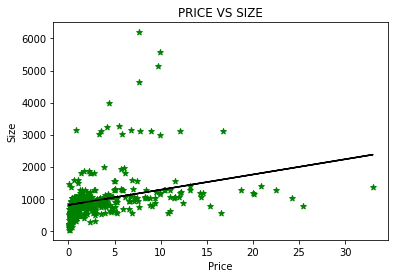

In [15]:
%matplotlib inline
pt.xlabel("Price")
pt.ylabel("Size")
pt.title("PRICE VS SIZE")
pt.scatter(data.PRICE,data.SIZE, color='green', marker = '*')
pt.plot(data.PRICE, mod.predict(data[['PRICE']]), color = 'black')
